In [ ]:
# Exercise 3 (p.332, Chap.8), 5 (p.332, Chap.8), 8 (p.333, Chap.8), 9 (p.334, Chap.8) and 10 (p.334, Chap.8)

# Exercise 3 chapter 8


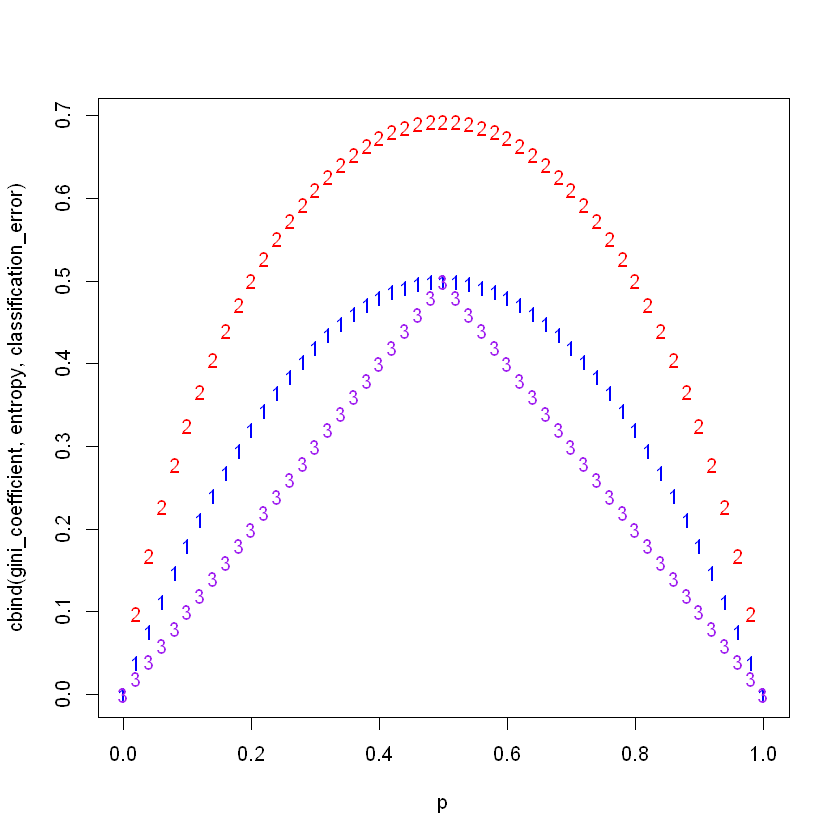

In [5]:
#Create a single plot that displays each of these quantities as a function of ˆpm1.
p = seq(0, 1, 0.02)
gini_coefficient = p * (1 - p) * 2
entropy = -(p * log(p) + (1 - p) * log(1 - p))
classification_error = 1 - pmax(p, 1 - p)
matplot(p, cbind(gini_coefficient, entropy, classification_error), col = c("blue", "red", "purple"))

# Exercise 5 chapter 8

In [ ]:
# RED: If we take the majority vote approach the result will be red as out of the 10 observations, the probability of getting a red observation being this one more than 0.5 is the 6 out of the 10 times

# GREEN: However, if we consider the average probability approach, we should compute the average of the independent probabilities events, it turns out to be 45% probability of getting a red classification whihc means that in this case the output will be green.

# Exercise 8 chapter 8

In [9]:
# (a) Split the data set into a training set and a test set

In [21]:
library(ISLR)
set.seed(123)
train <- sample(1:nrow(Carseats), nrow(Carseats) / 2)
Carseats_train <- Carseats[train, ]
Carseats_test <- Carseats[-train, ]

In [11]:
# (b) Fit a regression tree to the training set. Plot the tree, and interpret the results. What test MSE do you obtain?

In [22]:
#fit the regression tree to the train set
install.packages("tree")
library(tree)
regression_tree <- tree(Sales ~ ., data = Carseats_train)
summary(regression_tree)


  There is a binary version available but the source version is later:
     binary source needs_compilation
tree 1.0-40 1.0-41              TRUE

  Binaries will be installed


Warning message:
"package 'tree' is in use and will not be installed"


Regression tree:
tree(formula = Sales ~ ., data = Carseats_train)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Income"      "Age"         "Population" 
[6] "Education"   "CompPrice"   "Advertising"
Number of terminal nodes:  18 
Residual mean deviance:  2.132 = 388.1 / 182 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-4.08000 -0.92870  0.06244  0.00000  0.87020  3.71700 

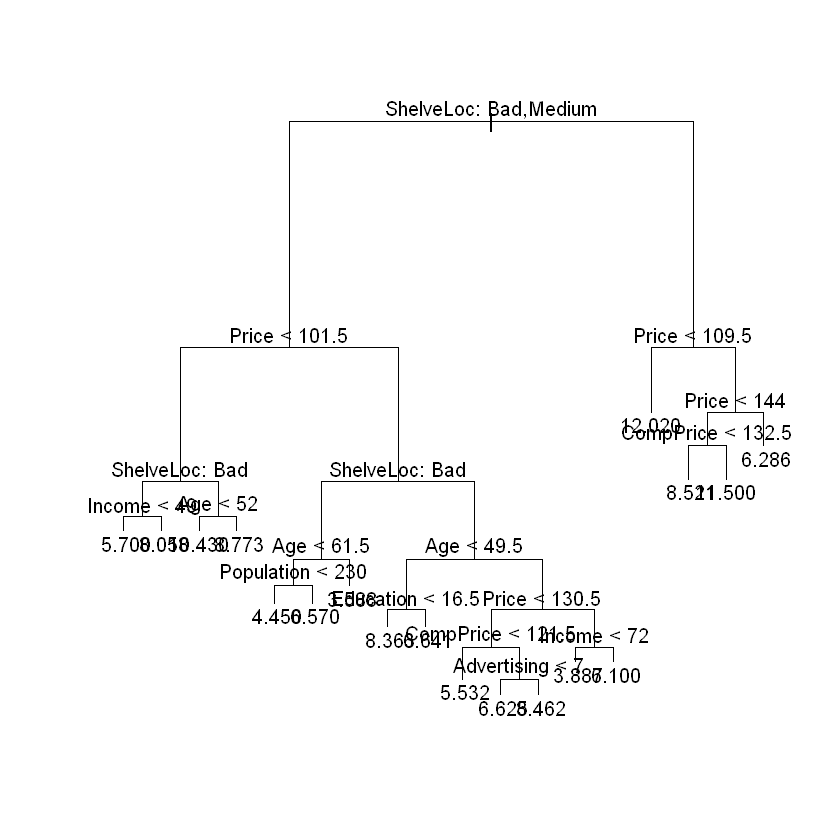

In [23]:
#plot the tree
plot(regression_tree)
text(regression_tree, pretty = 0)

In [24]:
#compute the MSE
MSE <- predict(regression_tree, newdata = Carseats_test)
mean((MSE - Carseats_test$Sales)^2)

[1] 4.395357

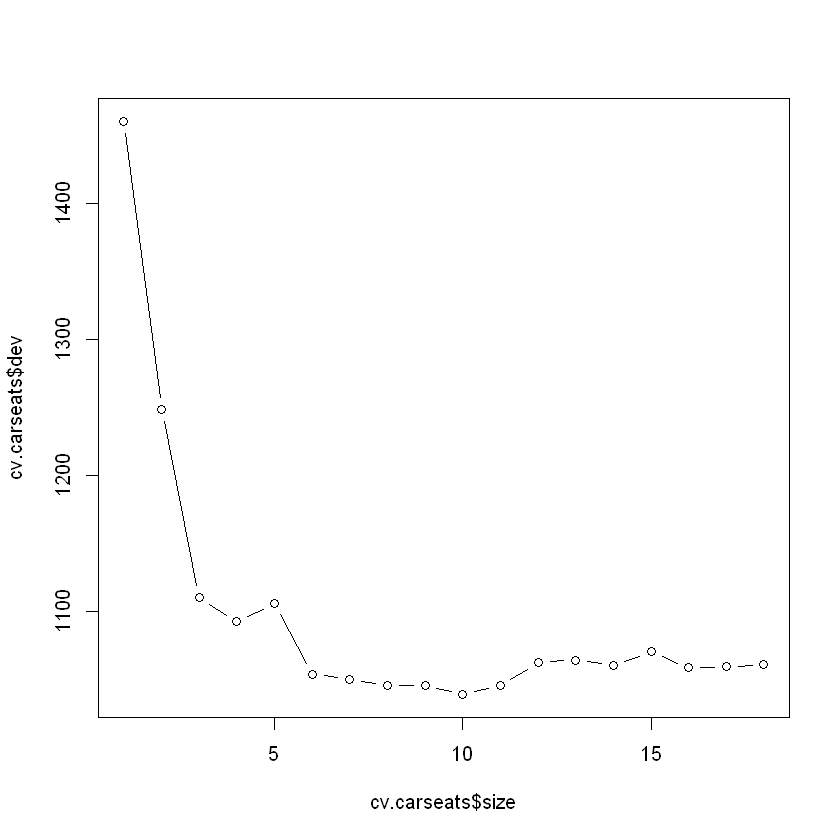

In [30]:
# (c) Use cross-validation in order to determine the optimal level of tree complexity. Does pruning the tree improve the test MSE?
cv.carseats=cv.tree(regression_tree)
plot(cv.carseats$size  ,cv.carseats$dev ,type='b')

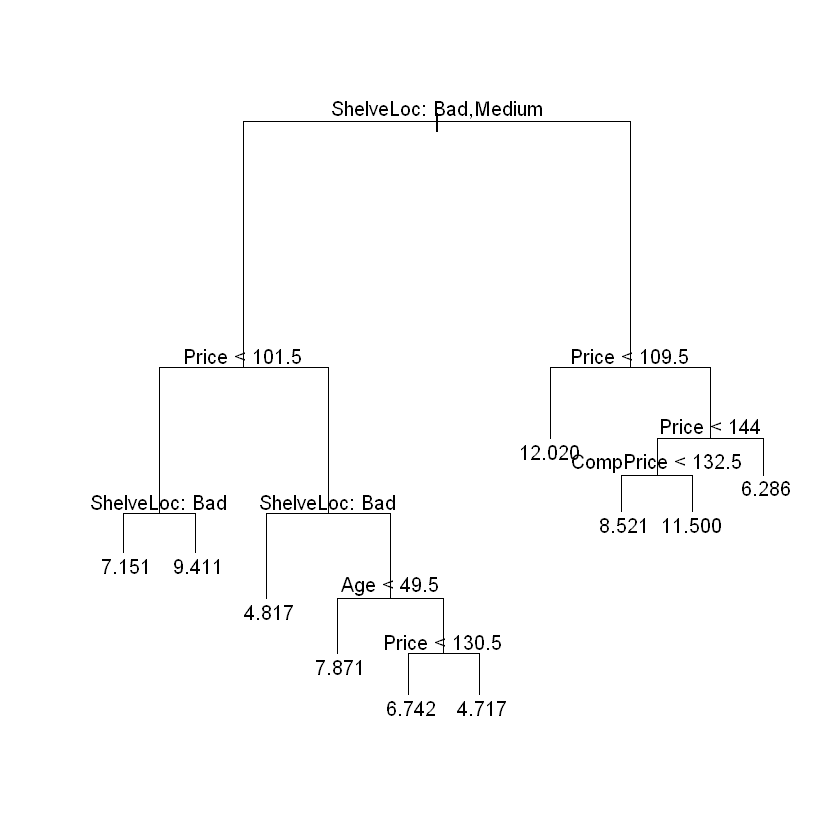

In [31]:
#pruning
prune.carseats=prune.tree(regression_tree ,best=10)
plot(prune.carseats)
text(prune.carseats , pretty =0)


In [32]:
#we calculate the MSE to check the improvement
MSE <- predict(prune.carseats, newdata = Carseats_test)
mean((MSE - Carseats_test$Sales)^2)


#It improved

[1] 4.712883

In [44]:
# (d) Use the bagging approach in order to analyze this data. What test error rate do you obtain ? Use the “importance()” function to determine which variables are most important.
library( randomForest)
set.seed(123)
bag_carseats= randomForest( Sales∼.,data=Carseats , subset=Carseats_train, mtry=10, importance =TRUE)

ERROR: Error in xj[i]: invalid subscript type 'list'


In [45]:
MSE <- predict(bag_carseats, newdata = Carseats_test)
mean((MSE- Carseats_test$Sales)^2)

ERROR: Error in predict(bag_carseats, newdata = Carseats_test): object 'bag_carseats' not found


In [46]:
importance(bag_carseats)

ERROR: Error in importance(bag_carseats): object 'bag_carseats' not found


# Excercise 9 chapter 8

In [50]:
# (a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.
set.seed(123)
train <- sample(1:nrow(OJ), 800)
OJ_train <- OJ[train, ]
OJ_test <- OJ[-train, ]

In [51]:
# (b) Fit a tree to the training data, with “Purchase” as the response and the other variables except for “Buy” as predictors.
fit_tree <- tree(Purchase ~ ., data = OJ_train)
summary(fit_tree)


Classification tree:
tree(formula = Purchase ~ ., data = OJ_train)
Variables actually used in tree construction:
[1] "LoyalCH"   "PriceDiff"
Number of terminal nodes:  8 
Residual mean deviance:  0.7625 = 603.9 / 792 
Misclassification error rate: 0.165 = 132 / 800 

In [ ]:
#8 terminal nodes, training error rate of 0.165.

In [52]:
# (c) Type in the name of the tree object in order to get a detailed text output. Pick one of the terminal nodes, and interpret the information displayed.

fit_tree

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 800 1071.00 CH ( 0.60875 0.39125 )  
   2) LoyalCH < 0.5036 350  415.10 MM ( 0.28000 0.72000 )  
     4) LoyalCH < 0.276142 170  131.00 MM ( 0.12941 0.87059 )  
       8) LoyalCH < 0.0356415 56   10.03 MM ( 0.01786 0.98214 ) *
       9) LoyalCH > 0.0356415 114  108.90 MM ( 0.18421 0.81579 ) *
     5) LoyalCH > 0.276142 180  245.20 MM ( 0.42222 0.57778 )  
      10) PriceDiff < 0.05 74   74.61 MM ( 0.20270 0.79730 ) *
      11) PriceDiff > 0.05 106  144.50 CH ( 0.57547 0.42453 ) *
   3) LoyalCH > 0.5036 450  357.10 CH ( 0.86444 0.13556 )  
     6) PriceDiff < -0.39 27   32.82 MM ( 0.29630 0.70370 ) *
     7) PriceDiff > -0.39 423  273.70 CH ( 0.90071 0.09929 )  
      14) LoyalCH < 0.705326 130  135.50 CH ( 0.78462 0.21538 )  
        28) PriceDiff < 0.145 43   58.47 CH ( 0.58140 0.41860 ) *
        29) PriceDiff > 0.145 87   62.07 CH ( 0.88506 0.11494 ) *
      15) LoyalCH > 0.705326 293  112.50 CH ( 0.952

In [ ]:
# node 9 is a terminal node (we know it for the *), the criteria to split is LoyalCH > 0.0356415, the observations per "branch" is 114
# deviance = 108.90
#<2% of the observations =CH, 98% = value of MM

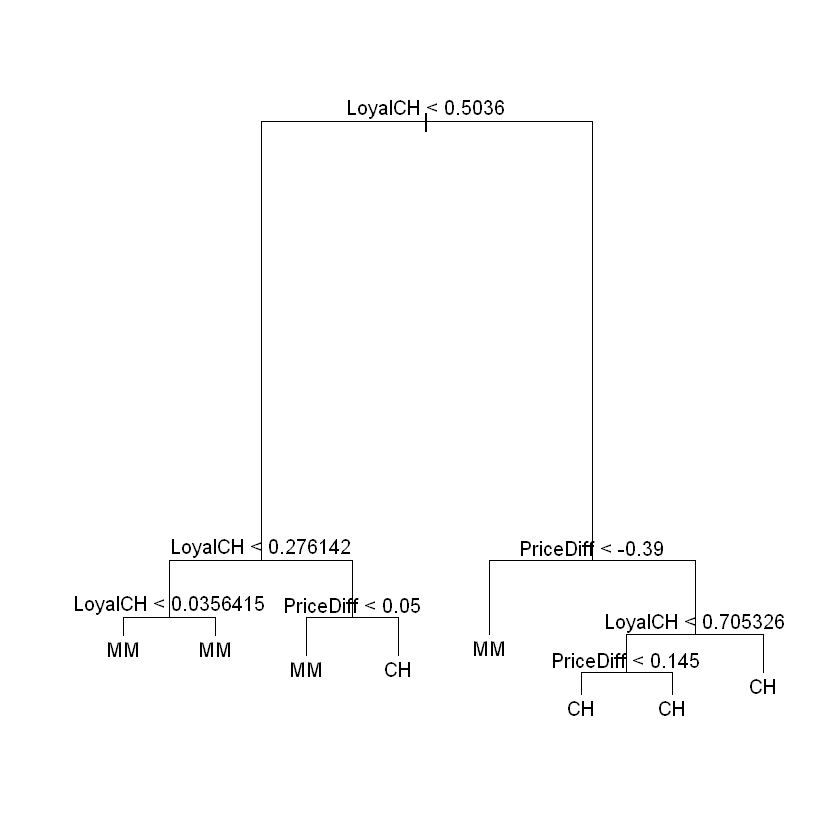

In [53]:
# (d) Create a plot of the tree, and interpret the results.
plot(fit_tree)
text(fit_tree, pretty = 0)

In [54]:
# (e) Predict the response on the test data, and produce a confusion matrix comparing the test labels to the predicted test labels. What is the test error rate?
pred_tree <- predict(fit_tree, OJ_test, type = "class")
table(pred_tree, OJ_test$Purchase)

         
pred_tree  CH  MM
       CH 150  34
       MM  16  70

In [57]:
#error rate calculation
error_rate=(150+70)/270
1-error_rate

[1] 0.1851852

In [ ]:
# (f) Apply the “cv.tree()” function to the training set in order to determine the optimal size tree.

In [58]:
cv_tree <- cv.tree(fit_tree, FUN = prune.misclass)
cv_tree

$size
[1] 8 5 3 2 1

$dev
[1] 141 138 161 165 313

$k
[1] -Inf    0    8   11  154

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

In [ ]:
# (g) Produce a plot with tree size on the x-axis and cross-validated classification error rate on the y-axis

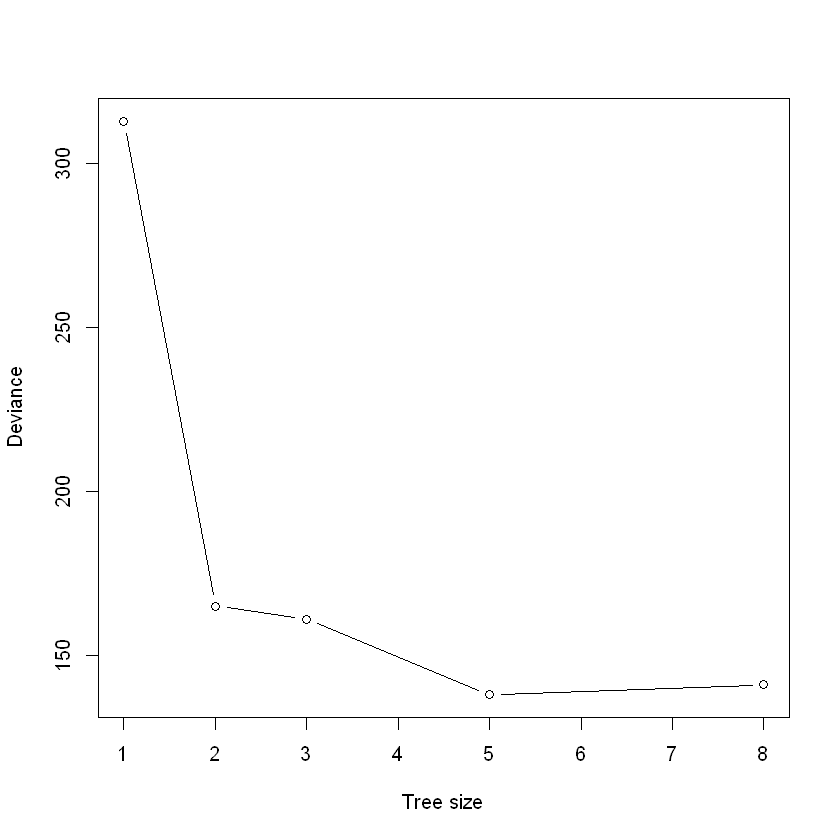

In [59]:
plot(cv_tree$size, cv_tree$dev, type = "b", xlab = "Tree size", ylab = "Deviance")


In [ ]:
# (h) Which tree size corresponds to the lowest cross-validated classification error rate?
#Node 2

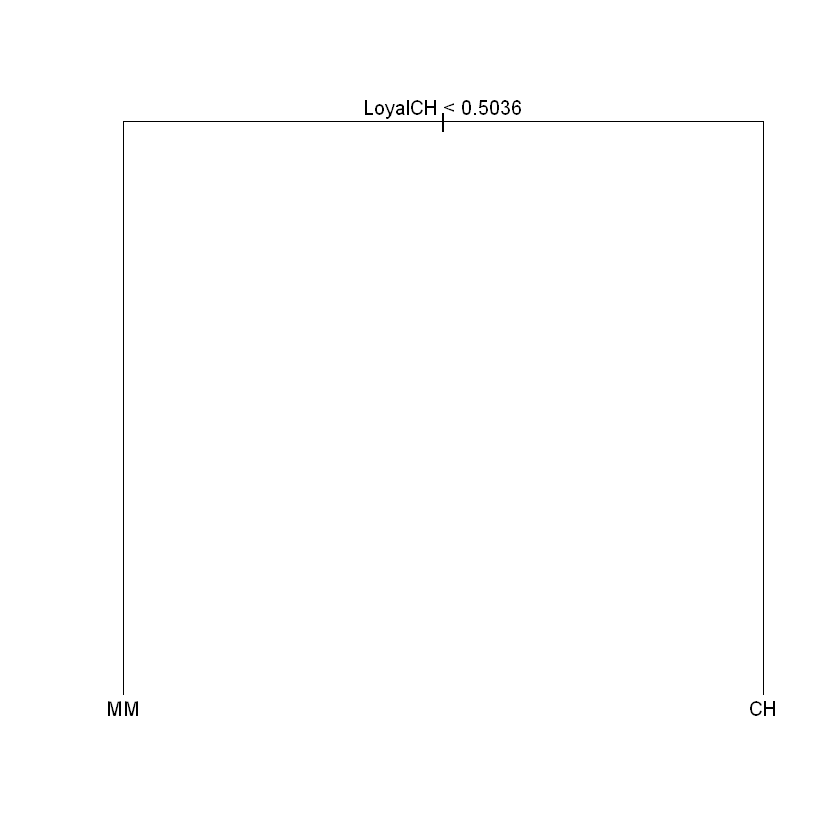

In [60]:
# (i) Produce a pruned tree corresponding to the optimal tree size obtained using cross-validation. If cross-validation does not lead to selection of a pruned tree, then create a pruned tree with five terminal nodes.

prune_tree<- prune.misclass(fit_tree, best = 2)
plot(prune_tree)
text(prune_tree, pretty = 0)

In [61]:
# (j) Compare the training error rates between the pruned and unpruned trees. Which is higher ?
summary(fit_tree)
summary(prune_tree)


Classification tree:
tree(formula = Purchase ~ ., data = OJ_train)
Variables actually used in tree construction:
[1] "LoyalCH"   "PriceDiff"
Number of terminal nodes:  8 
Residual mean deviance:  0.7625 = 603.9 / 792 
Misclassification error rate: 0.165 = 132 / 800 


Classification tree:
snip.tree(tree = fit_tree, nodes = 2:3)
Variables actually used in tree construction:
[1] "LoyalCH"
Number of terminal nodes:  2 
Residual mean deviance:  0.9677 = 772.2 / 798 
Misclassification error rate: 0.1988 = 159 / 800 

In [ ]:
#it is higher in the pruned

In [63]:
# (k) Compare the test error rates between the pruned and unpruned trees. Which is higher?
pred_tree2 <- predict(prune_tree, OJ_test, type = "class")
table(pred_tree2, OJ_test$Purchase)

          
pred_tree2  CH  MM
        CH 131  20
        MM  35  84

In [64]:
error_rate2= (131+84)/270
1-error_rate2

[1] 0.2037037

In [ ]:
# the error rate is higher in the pruned